<a href="https://colab.research.google.com/github/toviyahw/toviyahw/blob/main/I310D_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*NOTE: Ensure the project is human-centered every step of the way. WHY are we asking the questions and WHY are we analyzing the data the way that we are?*

NOTE: Keep code organized and logical



### Step 1: Collect and preprocess the data

Dataset Link: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data

Using Dataset #2: diabetes_binary_5050split_health_indicators_BRFSS2015.csv

(a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.)

In [ ]:
# Load data as a pandas dataframe
import pandas as pd
diabetes_df = pd.read_csv('diabetes_data.csv')
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#### Cleaning and Transforming the Data

In [ ]:
# Keep only desired columns in the dataframe
desired_cols = ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'Sex', 'Age', 'Income', ]
diabetes_df = diabetes_df[desired_cols]
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,GenHlth,Sex,Age,Income
0,0.0,1.0,0.0,26.0,0.0,3.0,1.0,4.0,8.0
1,0.0,1.0,1.0,26.0,1.0,3.0,1.0,12.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,1.0,13.0,8.0
3,0.0,1.0,1.0,28.0,1.0,3.0,1.0,11.0,8.0
4,0.0,0.0,0.0,29.0,1.0,2.0,0.0,8.0,8.0


In [ ]:
# Describe the dataset
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,GenHlth,Sex,Age,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,29.856985,0.475273,2.837082,0.456997,8.584055,5.698311
std,0.500004,0.495960,0.499342,7.113954,0.499392,1.113565,0.498151,2.852153,2.175196
min,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,25.000000,0.000000,2.000000,0.000000,7.000000,4.000000
50%,0.500000,1.000000,1.000000,29.000000,0.000000,3.000000,0.000000,9.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,4.000000,1.000000,11.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,5.000000,1.000000,13.000000,8.000000


Clean/Transform BMI

{'whiskers': [<matplotlib.lines.Line2D at 0x78a622e87fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x78a622e84970>,
 'boxes': [<matplotlib.lines.Line2D at 0x78a622c0aa70>],
 'medians': [<matplotlib.lines.Line2D at 0x78a622e87970>],
 'fliers': [<matplotlib.lines.Line2D at 0x78a622e87700>],
 'means': []}

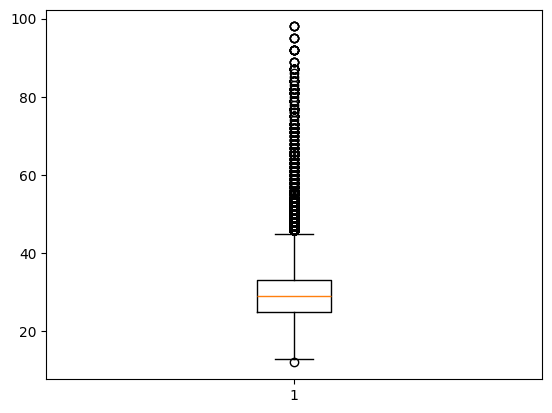

In [ ]:
# Visualize BMI
import matplotlib.pyplot as plt
plt.boxplot(diabetes_df['BMI'])

In [ ]:
# Deal with BMI outliers by using min-max normalization
from sklearn.preprocessing import MinMaxScaler

# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Replace BMI column with transformed data
diabetes_df['BMI'] = scaler.fit_transform(diabetes_df[['BMI']])

### Step 2: Exploratory Data Analysis
Examine the distribution of each health indicator across diabetic status groups

In [ ]:
# Describe the dataset
  # df.describe()
  # df['column'].describe()

# Histograms: BMI, Age, Income

# Bar graphs: general_health, high_cholesterol, high_BP, sex

# Just make boxplots (to find outliers and stuff) and do a bunch of df.describe()

In [ ]:
#Bar graphs
# get the first 10 rows that are needed for the graph
subset = IMDB_movies_df[['director_name', 'gross']].head(10)

# plots the 10 rows into a bar graph
plt.bar(subset['director_name'], subset['gross'], color='maroon', width = 0.8)

# adds axis labels with units
plt.xlabel("Director Name")
plt.ylabel("Gross in '$'")

# adds a title to the graph
plt.title("Gross for the first 10 rows")
plt.xticks(rotation=30)

<Axes: >

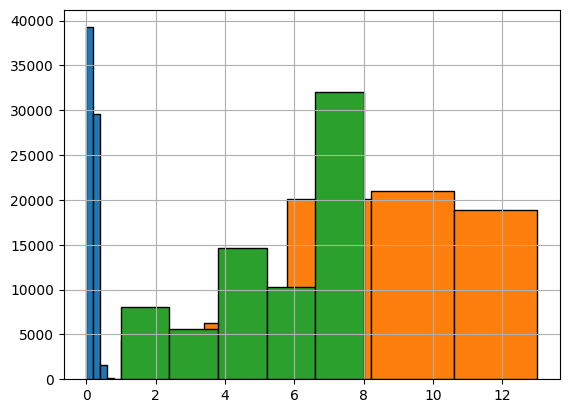

In [ ]:
# Histograms
BMI = diabetes_df["BMI"]
Age = diabetes_df["Age"]
Income = diabetes_df["Income"]
BMI.hist(bins=5, edgecolor='black')
Age.hist(bins=5, edgecolor='black')
Income.hist(bins=5, edgecolor='black')

<Axes: >

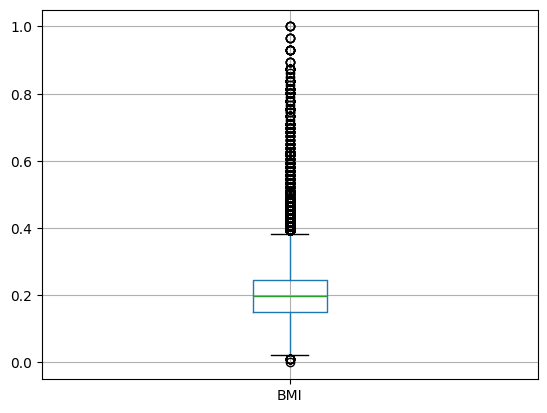

In [16]:
#Boxplots
diabetes_df.boxplot(column='BMI')

<Axes: >

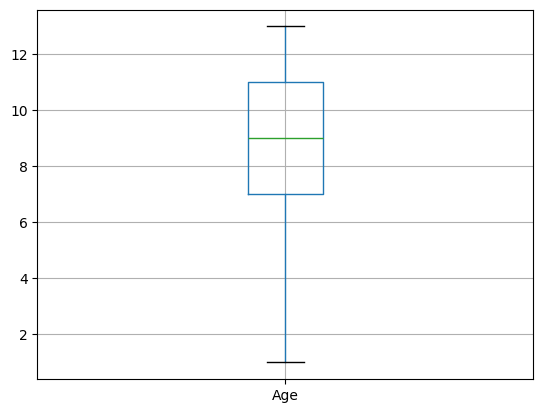

In [17]:
diabetes_df.boxplot(column='Age')

<Axes: >

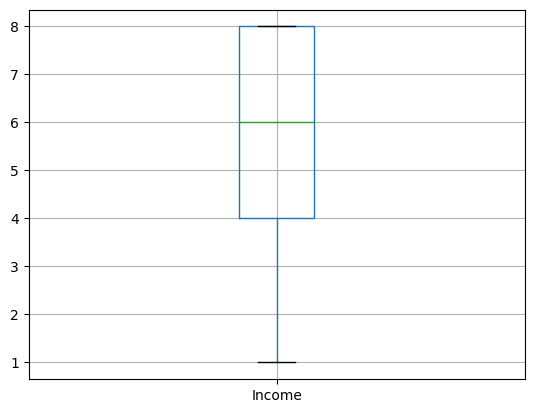

In [18]:
diabetes_df.boxplot(column='Income')

### Step 3: Binary Logistic Regression Model
Evaluate performance with accuracy, precision, and recall for each class.